In [52]:
from fastai.vision.all import *
import os
from PIL import Image
import cv2
import numpy as np

In [53]:
# Load image
img = cv2.imread("/kaggle/input/spr-x-ray-age/kaggle/kaggle/train/000053.png")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find contour with largest area (black border)
max_contour = max(contours, key=cv2.contourArea)

# Create mask for black border
mask = np.zeros_like(thresh)
cv2.drawContours(mask, [max_contour], 0, 255, -1)

# Apply mask to original image
result = cv2.bitwise_and(img, img, mask=mask)

# Display result
cv2.imshow('Result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/highgui/src/window.cpp:1274: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [51]:
crop = img[y:y+h,x:x+w]
cv2.imwrite('sofwinres.png',crop)

True

In [ ]:
im = PILImage.create("sofwinres.png")
im.shape

In [41]:
df1 = pd.read_csv("/kaggle/input/spr-x-ray-age/train_age.csv")
train_files = os.listdir("/kaggle/input/spr-x-ray-age/kaggle/kaggle/train")
df2 = pd.DataFrame({"name": train_files,
      "imageId": [int(x.split(".")[0]) for x in train_files]
      })

df = df1.merge(df2)[["name","age"]].head(100)

dls = ImageDataLoaders.from_df(df,
                               item_tfms=Resize(256, method="squish"),
#                                batch_tfms=[Rotate(max_deg=5), 
#                                              Zoom(max_zoom=1.1)],
                               y_block=RegressionBlock(),
                               seed=99,
                               path="/kaggle/input/spr-x-ray-age/kaggle/kaggle/train")                   

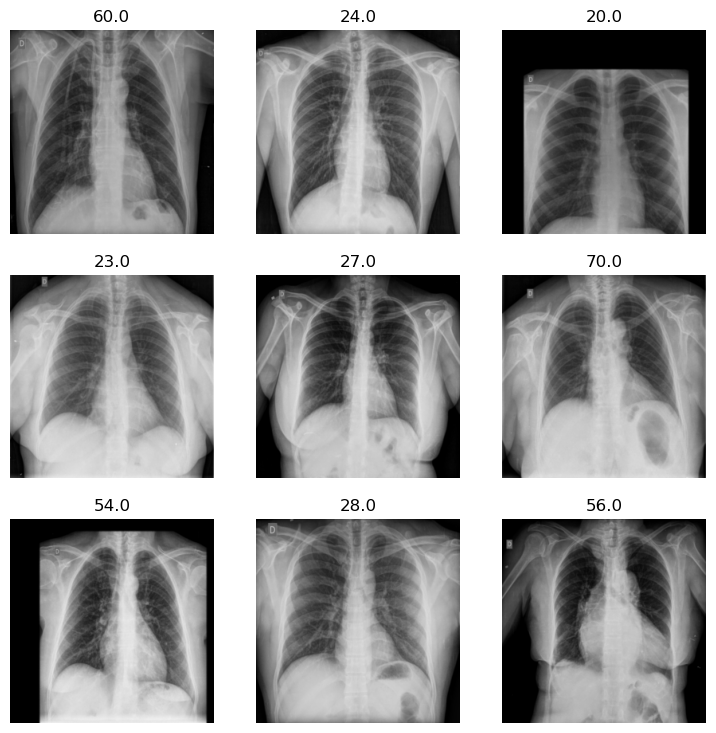

In [42]:
dls.show_batch()

In [ ]:
dls = ImageDataLoaders.from_df(df,
                               item_tfms=Resize(256, method="squish"),
#                                batch_tfms=[Rotate(max_deg=5), 
#                                              Zoom(max_zoom=1.1)],
                               y_block=RegressionBlock(),
                               seed=99,
                               path="/kaggle/input/spr-x-ray-age/kaggle/kaggle/train") 

It appears that not all X-rays take up the whole pixel-space. Need a strategy to get just the scan in these instances.

In [5]:
learn = vision_learner(dls, resnet50, metrics=mae)
learn.fine_tune(1)

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,mae,time
0,2797.177490,3815.280029,58.912598,01:00


epoch,train_loss,valid_loss,mae,time
0,2543.690186,3837.666748,59.108356,01:13


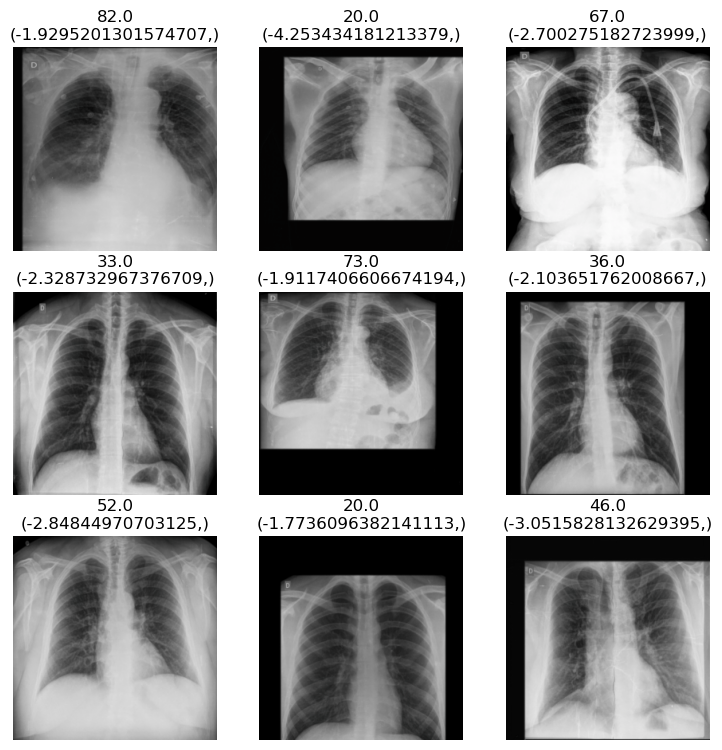

In [7]:
learn.show_results()

In [13]:
dls = ImageDataLoaders.from_df(df,
                               item_tfms=Resize(256, method="squish"),
                               batch_tfms=[Rotate(max_deg=5), 
                                             Zoom(max_zoom=1.1)],
                               y_block=RegressionBlock(),
                               path="/kaggle/input/spr-x-ray-age/kaggle/kaggle/train")    

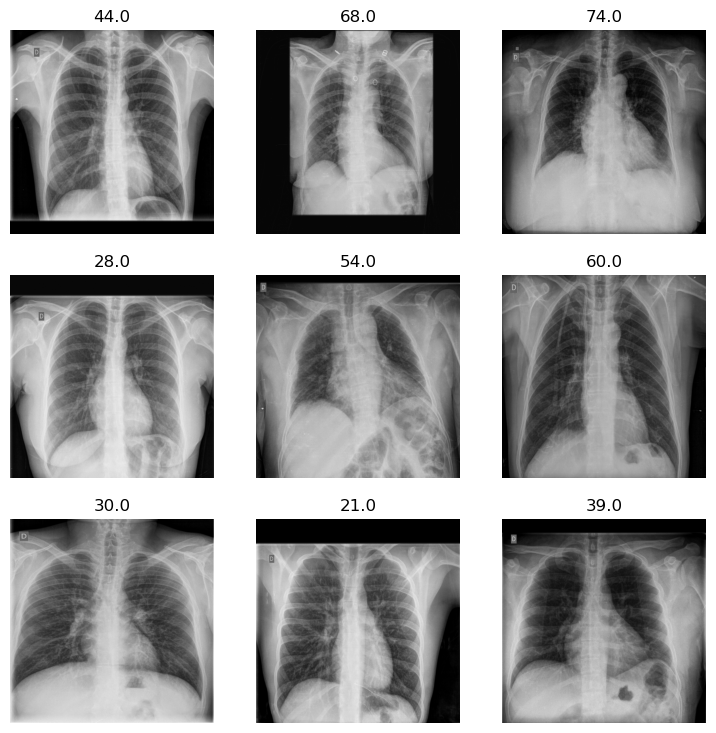

In [21]:
df1 = pd.read_csv("/kaggle/input/spr-x-ray-age/train_age.csv")
train_files = os.listdir("/kaggle/input/spr-x-ray-age/kaggle/kaggle/train")
df2 = pd.DataFrame({"name": train_files,
      "imageId": [int(x.split(".")[0]) for x in train_files]
      })

df = df1.merge(df2)[["name","age"]].head(100)

dls = ImageDataLoaders.from_df(df,
#                                item_tfms=Resize(256, method="squish"),
#                                batch_tfms=[Rotate(max_deg=5), 
#                                              Zoom(max_zoom=1.1)],
                               y_block=RegressionBlock(),
                               path="/kaggle/input/spr-x-ray-age/kaggle/kaggle/train")
dls.show_batch()

In [ ]:
test_files = os.listdir("/kaggle/input/spr-x-ray-age/kaggle/kaggle/test")
preds = [float(learn.predict("/kaggle/input/spr-x-ray-age/kaggle/kaggle/test/"+x)[1]) if
         float(learn.predict("/kaggle/input/spr-x-ray-age/kaggle/kaggle/test/"+x)[1]) > 0 else 0 
         for x in test_files]
df = pd.DataFrame({
    "imageId": [int(x.split(".")[0]) for x in test_files],
    "age": preds
})

df.to_csv("submission.csv", index = False)

In [ ]:
learn.save("age_model", with_opt=False)